In [10]:
import pandas as pd
import numpy as np 
import re
import pyarabic.araby as araby
import tweepy
import seaborn as sns
from textblob import TextBlob
from pyarabic.araby import strip_harakat
from pyarabic.araby import strip_tashkeel
from pyarabic.araby import strip_diacritics
from pyarabic.araby import strip_tatweel, strip_shadda
from pyarabic.araby import normalize_ligature
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score
labels=['state','tweet']


df1=pd.read_csv('negative.tsv',sep='\t',names=labels)
df2=pd.read_csv("positive.tsv",sep="\t",names=labels)


In [11]:
df=df1.append(df2)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45275 entries, 0 to 22760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   45275 non-null  object
 1   tweet   45275 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [12]:
df.nunique()

state        2
tweet    29449
dtype: int64

In [13]:
df.shape

(45275, 2)

In [14]:
df

,state,tweet
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔
...,...,...
22756,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
22757,pos,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂
22758,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
22759,pos,- ألطف صورة ممكن تعبر عن رمضان 💙


In [15]:
 def remove_emojis(data) :
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


In [16]:
 df['tweet']=df['tweet'].apply(remove_emojis)

In [17]:
df

,state,tweet
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرةمضاد بنسلين عل...
4,neg,الدودو جايه تكمل علي
...,...,...
22756,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
22757,pos,لابسة احمر ليه يا ست انتي ايه المناسبة
22758,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
22759,pos,- ألطف صورة ممكن تعبر عن رمضان


In [18]:
df['tweet']=df['tweet'].apply(strip_harakat)

In [19]:
df

,state,tweet
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرةمضاد بنسلين عل...
4,neg,الدودو جايه تكمل علي
...,...,...
22756,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
22757,pos,لابسة احمر ليه يا ست انتي ايه المناسبة
22758,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
22759,pos,- ألطف صورة ممكن تعبر عن رمضان


In [20]:
df['tweet']=df['tweet'].apply(strip_tashkeel)

In [21]:
df

,state,tweet
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرةمضاد بنسلين عل...
4,neg,الدودو جايه تكمل علي
...,...,...
22756,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
22757,pos,لابسة احمر ليه يا ست انتي ايه المناسبة
22758,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
22759,pos,- ألطف صورة ممكن تعبر عن رمضان


In [22]:
df['tweet']=df['tweet'].apply(araby.strip_diacritics)

In [23]:
df['tweet']=df['tweet'].apply(araby.strip_shadda)

In [24]:
df['tweet']=df['tweet'].apply(araby.strip_tatweel)

In [25]:
df['tweet']=df['tweet'].apply(araby.normalize_ligature)

In [26]:
df['tweet'] = df['tweet'].replace({'\#': '', ',': '','$':''}, regex=True)

In [27]:
df

,state,tweet
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال وا...
3,neg,نعمة المضادات الحيوية . تضع قطرةمضاد بنسلين عل...
4,neg,الدودو جايه تكمل علي
...,...,...
22756,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
22757,pos,لابسة احمر ليه يا ست انتي ايه المناسبة
22758,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
22759,pos,- ألطف صورة ممكن تعبر عن رمضان


### removing stop words 

In [31]:
import nltk

In [32]:
from nltk.corpus import stopwords
arabic =stopwords.words('arabic')
print(len(arabic))


754


In [33]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
#pip install arabicstopwords

In [34]:
from nltk.corpus import stopwords
arabic =stopwords.words('arabic')
print(len(arabic))


754


In [35]:
print(arabic)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [36]:
df['tweet_without_stopwords'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (arabic)]))

In [37]:
df.head(50)

,state,tweet,tweet_without_stopwords
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...,اعترف ان بتس كانو شوي شوي يجيبو راسي اليوم بال...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
2,neg,الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال وا...,الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال وا...
3,neg,نعمة المضادات الحيوية . تضع قطرةمضاد بنسلين عل...,نعمة المضادات الحيوية . تضع قطرةمضاد بنسلين بك...
4,neg,الدودو جايه تكمل علي,الدودو جايه تكمل علي
5,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...,أحببته أقنعنى فات العمر إنتظار
6,neg,يبدو ان دجلة اعتادت على التهام اجساد ابنائها م...,يبدو ان دجلة اعتادت التهام اجساد ابنائها سبايك...
7,neg,جالس أذاكر,جالس أذاكر
8,neg,يكفي استخفاف بالعقل العربي هل حقا الأمن والمخا...,يكفي استخفاف بالعقل العربي الأمن والمخابرات أل...
9,neg,ياليلل ترا اكلج كثير مشي,ياليلل ترا اكلج كثير مشي


In [38]:
df.drop('tweet',axis=1,inplace=True)

In [39]:
df

,state,tweet_without_stopwords
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي اليوم بال...
1,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
2,neg,الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال وا...
3,neg,نعمة المضادات الحيوية . تضع قطرةمضاد بنسلين بك...
4,neg,الدودو جايه تكمل علي
...,...,...
22756,pos,السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط
22757,pos,لابسة احمر ليه انتي ايه المناسبة
22758,pos,كلاام جمييل تستاهل(من احبه الله محبته قلوب البشر)
22759,pos,- ألطف صورة ممكن تعبر رمضان


In [40]:
from sklearn.utils import shuffle
df = shuffle(df)

In [41]:
df

,state,tweet_without_stopwords
9469,neg,إمسح قلبي الله انزعج وحين اغضب وحين أتألم وحين...
666,pos,الجميل التحرر مشاركة الزوجين أفكار بعضهما بلا ...
13176,neg,الا مو مسويه تسجيل دخول بسفاري
10950,neg,انفجار غضب الشعبي Explosion of popular anger ف...
5131,neg,انا صبحت عليكم ومحد رد الا وحده وزعلت :(
...,...,...
21596,neg,أصفن أحاجي الروح وين عني سم بالكلب فركاك حط وك...
2041,neg,السهل تضع يدك فمك لآ. تتكلم آلصعب تضع يدك قلبك ك…
15640,pos,شكرا، يوم جمييل .. أكبر شكرا للدكتورة منى وفري...
13412,pos,فليشهد صباحي.. فى صدري لهفة واشتياق.. كبرياء ا...


In [42]:
df.tweet_without_stopwords.isnull().sum()

0

In [31]:

df.tweet_without_stopwords.value_counts

<bound method IndexOpsMixin.value_counts of 125                        ماهي هالليله وبس وانت متغير علي
14999                                     كلام جميل أستاذه
17494                                        ازاى كده لوول
7787                                          تنزل كريتف ؟
8882                                      والله اتفق مليون
                               ...                        
14984                                         كفوو ابو سند
18096                   شوفو نضرات العابد والمعيوف جوفينكو
4075     ೋ ೋ اللهم أجعل دراستي أختباراتي كغيمة سريعة ، ...
5557     بالعكس دكتوره خيريه فنظرتك قمة الواقعيه وهي ال...
17660                                       انا صرت اضيعني
Name: tweet_without_stopwords, Length: 45275, dtype: object>

In [43]:
df.tweet_without_stopwords.duplicated().sum()

16410

In [33]:
df.duplicated().sum()

16209

In [44]:
df.drop_duplicates().shape

(29066, 2)

In [35]:
df.tweet_without_stopwords.drop_duplicates()

125                        ماهي هالليله وبس وانت متغير علي
14999                                     كلام جميل أستاذه
17494                                        ازاى كده لوول
7787                                          تنزل كريتف ؟
8882                                      والله اتفق مليون
                               ...                        
13131      كنت كيوت والله وانا صغير شاركنا_صورتك_وانت_صغير
14984                                         كفوو ابو سند
18096                   شوفو نضرات العابد والمعيوف جوفينكو
5557     بالعكس دكتوره خيريه فنظرتك قمة الواقعيه وهي ال...
17660                                       انا صرت اضيعني
Name: tweet_without_stopwords, Length: 28865, dtype: object

In [36]:
df.tweet_without_stopwords.drop_duplicates().shape

(28865,)

### sentimnet analysis(to get )

In [47]:
df=df.copy()
def getSubjectivity(text):
     return TextBlob(text).sentiment.subjectivity
    
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df["sujectivity"]=df["tweet_without_stopwords"].apply(getSubjectivity)
df["polarity"]=df["tweet_without_stopwords"].apply(getPolarity)

In [48]:
df.head(50)

,state,tweet_without_stopwords,sujectivity,polarity
9469,neg,إمسح قلبي الله انزعج وحين اغضب وحين أتألم وحين...,0.000000,0.000000
666,pos,الجميل التحرر مشاركة الزوجين أفكار بعضهما بلا ...,0.000000,0.000000
13176,neg,الا مو مسويه تسجيل دخول بسفاري,0.000000,0.000000
10950,neg,انفجار غضب الشعبي Explosion of popular anger ف...,0.616667,0.233333
5131,neg,انا صبحت عليكم ومحد رد الا وحده وزعلت :(,1.000000,-0.750000
18705,neg,ٲليس العيب ان تحفظ الأغاني .. وتكرر السورة صلا...,0.000000,0.000000
15568,neg,الحلقة التاسعة والعشرون السيرة النبوية تغريدات...,0.000000,0.000000
13197,pos,قوتنا الله دائما الف مبرووك الحمد لله الشكر,0.000000,0.000000
20490,pos,*إشراقة* *الاستغفار يمطر أرزاقا* *وأفراحا وسعا...,0.000000,0.000000
3049,pos,""" اجعل بينك وبين الله مشاريع خفية .. يعيد النا...",0.000000,0.000000


In [49]:
def getSentimentAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0:
            return 'Neutral'
    else:
        return 'Positive'
    
df["Analysis"] = df["polarity"].apply(getSentimentAnalysis)
     

In [50]:
df.head(50)

,state,tweet_without_stopwords,sujectivity,polarity,Analysis
9469,neg,إمسح قلبي الله انزعج وحين اغضب وحين أتألم وحين...,0.000000,0.000000,Neutral
666,pos,الجميل التحرر مشاركة الزوجين أفكار بعضهما بلا ...,0.000000,0.000000,Neutral
13176,neg,الا مو مسويه تسجيل دخول بسفاري,0.000000,0.000000,Neutral
10950,neg,انفجار غضب الشعبي Explosion of popular anger ف...,0.616667,0.233333,Positive
5131,neg,انا صبحت عليكم ومحد رد الا وحده وزعلت :(,1.000000,-0.750000,Negative
18705,neg,ٲليس العيب ان تحفظ الأغاني .. وتكرر السورة صلا...,0.000000,0.000000,Neutral
15568,neg,الحلقة التاسعة والعشرون السيرة النبوية تغريدات...,0.000000,0.000000,Neutral
13197,pos,قوتنا الله دائما الف مبرووك الحمد لله الشكر,0.000000,0.000000,Neutral
20490,pos,*إشراقة* *الاستغفار يمطر أرزاقا* *وأفراحا وسعا...,0.000000,0.000000,Neutral
3049,pos,""" اجعل بينك وبين الله مشاريع خفية .. يعيد النا...",0.000000,0.000000,Neutral


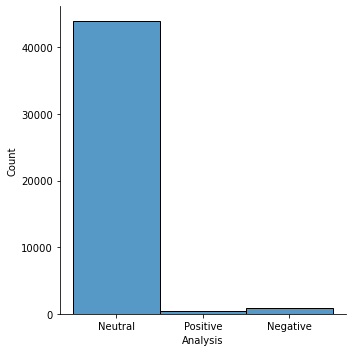

In [51]:
sns.displot(df['Analysis'])

In [52]:
most_negative=df[df.polarity==-1].tweet_without_stopwords.head()
print(most_negative)

10783             تعبت وانا اعيده يتعبب موت اف الموتشي :'(
3490     أرحمني الله بلغت التراقي وقيل راق والتفت الساق...
14098                  :( نفسي اطلع والله الجو كتير حلو !!
531      الى ؟ وانا احتري قلبك يلين :( والناس ! تتقدم و...
19316    اي مجال اطوف للدوام واطلع ؟ :( ياخي الجو بجنن!...
Name: tweet_without_stopwords, dtype: object


In [53]:
most_positive=df[df.polarity==1].tweet_without_stopwords.tail()
print(most_positive)

20873                             بقت نواقض الرجولة ايه :D
11858            :D فرتكتى الجبهة بتاعتنا ده شكله عبيط فكك
2909     يقولون ان الدنيا حلوه :D — watching Karmouz Wa...
16718                 يعني هحس بالرضا الموبايل يتكسر :D :D
6001     مين احلى انا احلى شوية طبعا بنات روسيا جامدين ...
Name: tweet_without_stopwords, dtype: object


In [54]:
# Convert Textual data to feature vectors
x=df['tweet_without_stopwords'].values

In [55]:
vectorizer = TfidfVectorizer(max_features=100,
                              max_df=0.8,
                              min_df=5,
                             ngram_range=(1,3))

vectors=vectorizer.fit_transform(x)

In [56]:
print(vectors)

  (0, 50)	0.6686951489651854
  (0, 24)	0.3717912482134661
  (0, 79)	0.6439084294387682
  (1, 43)	1.0
  (2, 87)	0.689222717483951
  (2, 11)	0.7245495467558019
  (4, 73)	0.6349267401013742
  (4, 39)	0.4867576423851652
  (4, 11)	0.5999458577937493
  (5, 38)	1.0
  (7, 15)	0.4307714981284334
  (7, 82)	0.3926648254325299
  (7, 14)	0.4154593599161008
  (7, 22)	0.4552463364247816
  (7, 53)	0.4676007557803295
  (7, 24)	0.2484835565823403
  (9, 29)	0.8478603212372252
  (9, 24)	0.5302196485151311
  (11, 87)	1.0
  (12, 25)	1.0
  (13, 67)	0.3808985848805159
  (13, 66)	0.37933878862829357
  (13, 8)	0.3966530080448548
  (13, 84)	0.38700657609925226
  (13, 15)	0.36132309780196814
  :	:
  (45260, 44)	1.0
  (45262, 77)	0.6853530152681875
  (45262, 23)	0.6373870238968075
  (45262, 24)	0.3521775492997446
  (45263, 24)	1.0
  (45264, 76)	0.32030261863549603
  (45264, 49)	0.3139406641290854
  (45264, 32)	0.32030261863549603
  (45264, 75)	0.31178297611888967
  (45264, 48)	0.3139406641290854
  (45264, 19)	0.28

In [57]:
feature_names = vectorizer.get_feature_names()

In [58]:
print(feature_names)

['neg', 'pos', 'xr', 'xr رتويت', 'xr رتويت وتابع', 'آيفون', 'آيفون xr', 'آيفون xr رتويت', 'أجمل', 'اذا', 'ال', 'الا', 'الاتحاد', 'الحب', 'الحمد', 'الحمد لله', 'الحياة', 'الخير', 'الدنيا', 'السحب', 'السحب ساعة', 'السحب ساعة موثق', 'الف', 'القلب', 'الله', 'اللهم', 'اللي', 'الليلة', 'المطر', 'الناس', 'النصر', 'الهلال', 'الهلال سحب', 'الهلال سحب آيفون', 'الهلال_الاهلي', 'الى', 'الي', 'اليوم', 'ان', 'انا', 'انت', 'انه', 'اني', 'او', 'اي', 'بالفديو', 'بالله', 'بمناسبة', 'بمناسبة فوز', 'بمناسبة فوز الهلال', 'ترى', 'جدا', 'خير', 'دائما', 'دي', 'رب', 'ربي', 'رتويت', 'رتويت وتابع', 'رتويت وتابع السحب', 'ساعة', 'ساعة موثق', 'ساعة موثق بالفديو', 'سحب', 'سحب آيفون', 'سحب آيفون xr', 'شاء', 'شاء الله', 'شي', 'شيء', 'ضد', 'عشان', 'علي', 'عليكم', 'فوز', 'فوز الهلال', 'فوز الهلال سحب', 'فيك', 'قال', 'قلبي', 'كانت', 'كنت', 'لله', 'مافي', 'مبروك', 'محمد', 'مش', 'مو', 'موثق', 'موثق بالفديو', 'هه', 'والله', 'وانا', 'وتابع', 'وتابع السحب', 'وتابع السحب ساعة', 'وش', 'يارب', 'يعني', 'يوم']


### cross validation using (k-fold)

In [60]:
from sklearn.model_selection import KFold
kf= KFold(n_splits=20 ,random_state = 22 , shuffle = True )
i = 1
for train_index,test_index in kf.split(df):
    print("Fold",i)
    print ("train data: ", train_index, "\n")
    print (" test data :",test_index)
    i +=1
  

Fold 1
train data:  [    0     1     2 ... 45272 45273 45274] 

 test data : [   20    27    72 ... 45205 45232 45256]
Fold 2
train data:  [    0     1     2 ... 45272 45273 45274] 

 test data : [    4     8    13 ... 45171 45186 45192]
Fold 3
train data:  [    0     1     2 ... 45271 45273 45274] 

 test data : [   30    32    50 ... 45255 45264 45272]
Fold 4
train data:  [    0     1     2 ... 45272 45273 45274] 

 test data : [   53    55    56 ... 45218 45240 45254]
Fold 5
train data:  [    0     1     2 ... 45272 45273 45274] 

 test data : [   48    60    62 ... 45260 45266 45268]
Fold 6
train data:  [    0     1     2 ... 45272 45273 45274] 

 test data : [    7    16    24 ... 45179 45223 45246]
Fold 7
train data:  [    0     1     4 ... 45272 45273 45274] 

 test data : [    2     3    81 ... 45208 45233 45250]
Fold 8
train data:  [    0     1     2 ... 45272 45273 45274] 

 test data : [   14    31    36 ... 45220 45230 45245]
Fold 9
train data:  [    0     2     3 ... 45272

In [52]:
Y=df['state']
classifier1 = LogisticRegression()
accuracy=cross_val_score(classifier1  ,vectors,Y , cv=kf, scoring='accuracy'  , n_jobs= -1 ).mean()
print("accuracy=",accuracy)
classifier1.fit(vectors,Y)
y_pred= classifier1.predict(vectors)
F_score=f1_score(Y,y_pred,average='macro')
print("F1_score=",F_score)

accuracy= 0.6168518192492846
F1_score= 0.604438847361702


In [53]:
from sklearn.svm import SVC
Y=df['state']
svm=SVC()
accuracy=cross_val_score(svm ,vectors,Y , cv=kf, scoring='accuracy'  , n_jobs= -1 ).mean()
print("accuracy=",accuracy)
svm.fit(vectors,Y)
y_pred= svm.predict(vectors)
F_score=f1_score(Y,y_pred,average='macro')
print("F1_score=",F_score)

accuracy= 0.6355155196750928
F1_score= 0.6418911672092973


In [54]:
from sklearn.tree import DecisionTreeClassifier
Y=df['state']
classifier3=DecisionTreeClassifier()
accuracy=cross_val_score(classifier3 ,vectors,Y , cv=kf, scoring='accuracy'  , n_jobs= -1 ).mean()
print("accuracy=",accuracy)
classifier3.fit(vectors,Y)
y_pred= classifier3.predict(vectors)
F_score=f1_score(Y,y_pred,average='macro')
print("F1_score=",F_score)

accuracy= 0.6354050761286574
F1_score= 0.6532625097389098
